In [174]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [175]:
def ShowImage(_img_):
    plt.imshow(_img_, cmap='gray')
    print(f"Width of image: {len(_img_[0])}\nHeight of image: {len(_img_)}\nRGB: {_img_[0][0]}")

Width of image: 64
Height of image: 64
RGB: [255 255 255]


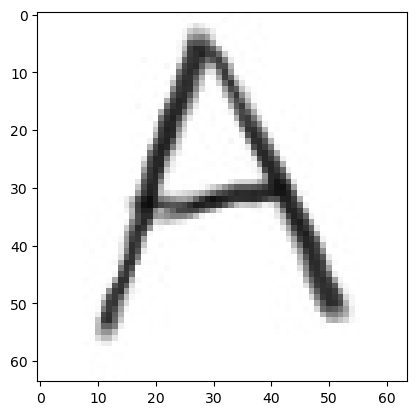

In [176]:
image = img.imread("Image_A02.jpg") #Image_A.jpg Image_A02.jpg
ShowImage(image)

In [177]:
def ConvertToGreyscale(_img_):
    image_ = []
    row = []
    for h in range(len(_img_)):
        for w in range(len(_img_[0])):
            row.append(sum(_img_[h][w])//3)
        image_.append(row)
        row = []
    return image_

In [178]:
image = ConvertToGreyscale(image)

Width of image: 64
Height of image: 64
RGB: 255


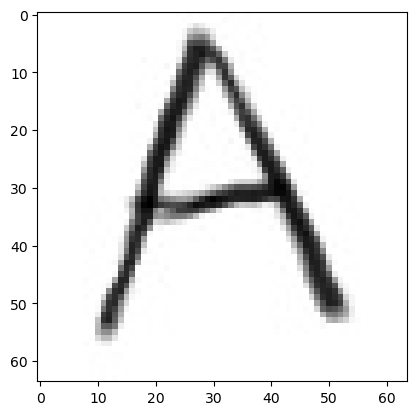

In [179]:
ShowImage(image)

In [180]:
def UpscaleImageClone(_img_, scale=2):  #   Same as Zoom in
    image_ = []
    row = []

    for h in range(len(_img_)):
        for w in range(len(_img_[0])):
            for s in range(scale):
                row.append(_img_[h][w])
        for s in range(scale):
            image_.append(row)
        row = []
    return image_

Width of image: 128
Height of image: 128
RGB: 255


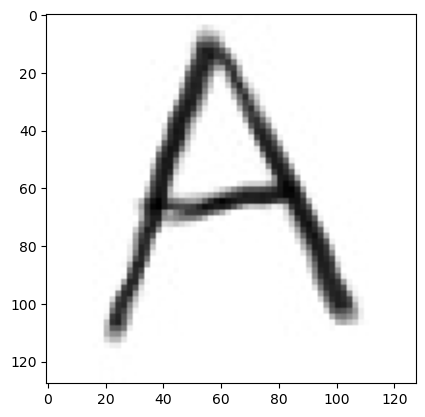

In [181]:
ShowImage(UpscaleImageClone(image,2))

Width of image: 32
Height of image: 32
RGB: 255


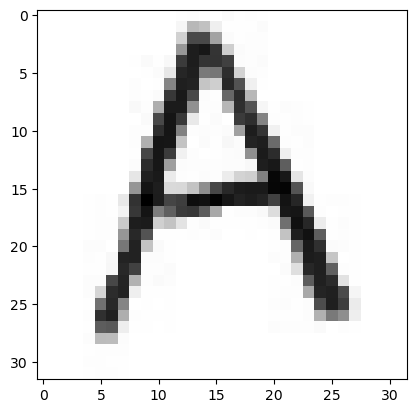

In [182]:
def DownScaleMin(_img_):        #       White pixel value = 255 and Black pixel value = 0
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append(min(_img_[h][w], _img_[h+1][w], _img_[h][w+1], _img_[h+1][w+1]))
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleMin(image))

Width of image: 32
Height of image: 32
RGB: 255


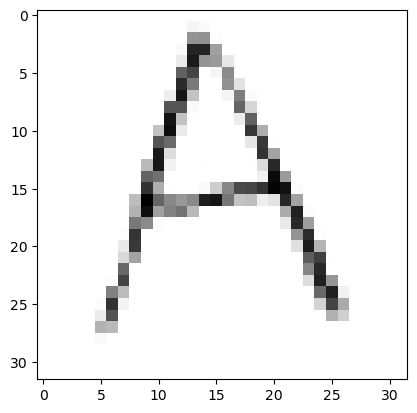

In [183]:
def DownScaleMax(_img_):
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append(max(_img_[h][w], _img_[h+1][w], _img_[h][w+1], _img_[h+1][w+1]))
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleMax(image))

In [184]:
type(image[0][0])

numpy.int32

Width of image: 32
Height of image: 32
RGB: 255


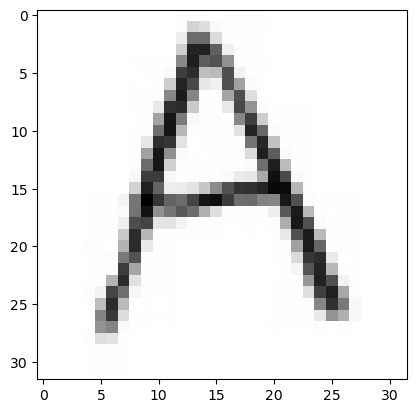

In [185]:
def DownScaleAvg(_img_):
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append((_img_[h][w] + _img_[h+1][w] + _img_[h][w+1] + _img_[h+1][w+1])//4)
        image_.append(row)
        row = []
    return image_

ShowImage(DownScaleAvg(image))

Width of image: 64
Height of image: 64
RGB: 255


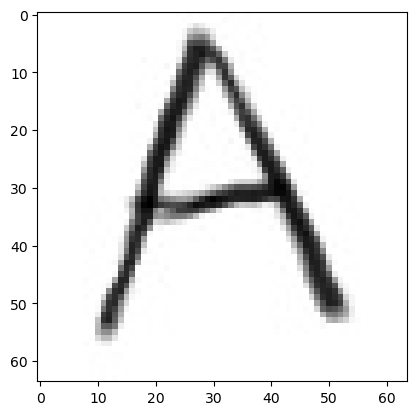

In [186]:
ShowImage(image)

Width of image: 64
Height of image: 64
RGB: 255


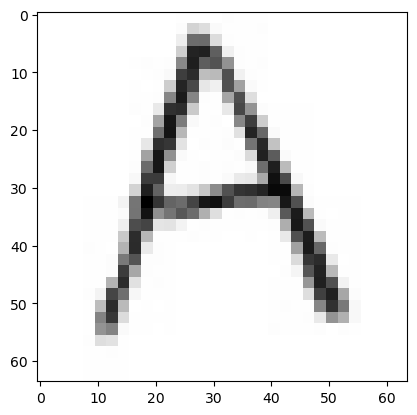

In [187]:
im = image

for i in range(0, 20):
    im = DownScaleAvg(im)
    im = UpscaleImageClone(im)

ShowImage(im)

In [188]:
def transpose(mat):
    row = []
    new_mat = []
    for i in range(len(mat[0])):
        for j in range(len(mat)):
            row.append(mat[j][i])
        new_mat.append(row)
        row = []
    return new_mat

In [189]:
def LERPhorizontal(_img_, scale=2):     # 0 10 -> 0 _ _ _ 10 _ _ _
    image_ = []
    row = []
    a, b, x = 0, 0, 0
    for h in range(len(_img_)):
        for w in range(len(_img_[0])-1):
            a = _img_[h][w]
            b = _img_[h][w+1]
            x = (b - a)//scale
            for s in range(scale):
                row.append(a + s*x)
        for s in range(scale):
            row.append(a + (s+scale)*x)
        # row.append(_img_[h][-1])
        image_.append(row)
        row = []
    return image_

In [190]:
def UpscaleImageLERP(_img_, scale=2):
    _img_ = LERPhorizontal(_img_,scale)
    _img_ = transpose(_img_)
    _img_ = LERPhorizontal(_img_,scale)
    _img_ = transpose(_img_)

    return _img_


Width of image: 128
Height of image: 128
RGB: 255


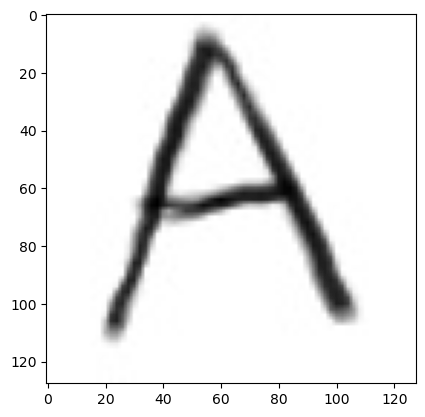

In [191]:
ShowImage(UpscaleImageLERP(image))

Width of image: 128
Height of image: 128
RGB: 255


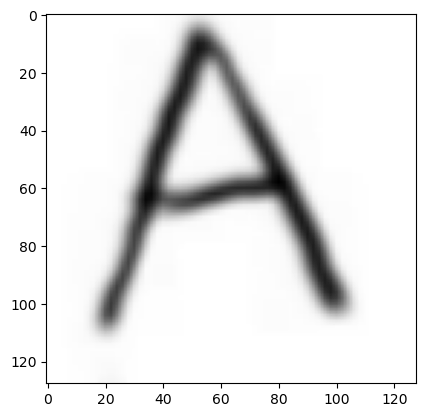

In [192]:
im = image
# im = UpscaleImageLERP(im,4)
# im = DownScaleMax(im)
for i in range(0,5):
    im = UpscaleImageLERP(im,2)
    im = DownScaleAvg(im)
    # im = DownScaleMin(im)
    # im = DownScaleMax(im)
im = UpscaleImageLERP(im)

ShowImage(im)


In [193]:
def DownScaleAvgRGB(_img_):
    image_ = []
    row = []
    rgb = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            for i in range(len(_img_[0][0])):
                rgb.append((_img_[h][w][i]//4 + _img_[h+1][w][i]//4 + _img_[h][w+1][i]//4 + _img_[h+1][w+1][i]//4))
            row.append(rgb)
            rgb = []
        image_.append(row)
        row =[]
    
    return image_

def DownScaleSkipRGB(_img_):
    image_ = []
    row = []
    for h in range(0, len(_img_), 2):
        for w in range(0, len(_img_[0]), 2):
            row.append(_img_[h][w])
        image_.append(row)
        row = []
    
    return image_

Width of image: 300
Height of image: 300
RGB: [191, 200, 208]


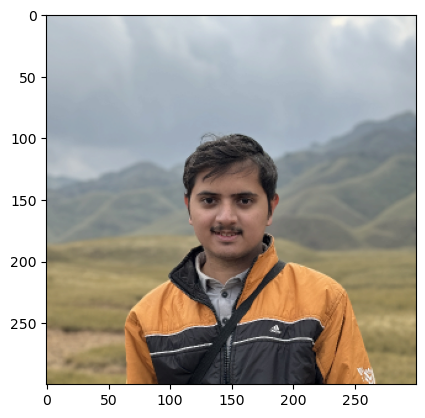

In [194]:
image = img.imread("Image_A.jpg")
image = DownScaleAvgRGB(DownScaleSkipRGB(DownScaleSkipRGB(image)))
# image = DownScaleAvgRGB(image)
ShowImage(image)

In [202]:
def UpdateRedComponent(_img_, scale = 10):
    image_ = []
    row = []
    rgb = []
    if scale == 0:
        return _img_
    elif scale > 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append((255 - _img_[h][w][0])*scale//100 + _img_[h][w][0])
                rgb.append((100 - scale)*_img_[h][w][1]//100)
                rgb.append((100 - scale)*_img_[h][w][2]//100)
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_
    if scale < 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append((100 + scale)*_img_[h][w][0]//100)
                rgb.append(_img_[h][w][1] - (255 - _img_[h][w][1])*scale//100)
                rgb.append(_img_[h][w][2] - (255 - _img_[h][w][2])*scale//100)
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_

Width of image: 300
Height of image: 300
RGB: [197, 180, 187]


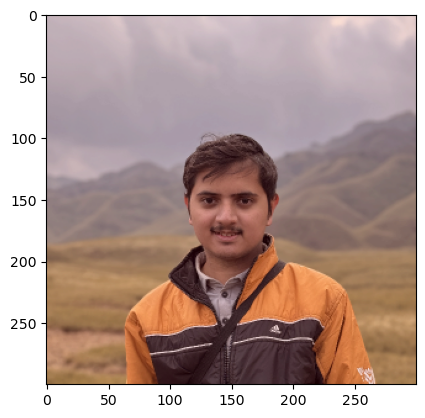

In [203]:
ShowImage(UpdateRedComponent(image, 10))

In [204]:
def UpdateGreenComponent(_img_, scale = 10):
    image_ = []
    row = []
    rgb = []
    if scale == 0:
        return _img_
    elif scale > 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append((100 - scale)*_img_[h][w][0]//100)
                rgb.append((255 - _img_[h][w][1])*scale//100 + _img_[h][w][1])
                rgb.append((100 - scale)*_img_[h][w][2]//100)
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_
    if scale < 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append(_img_[h][w][0] - (255 - _img_[h][w][0])*scale//100)
                rgb.append((100 + scale)*_img_[h][w][1]//100)
                rgb.append(_img_[h][w][2] - (255 - _img_[h][w][2])*scale//100)
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_

Width of image: 300
Height of image: 300
RGB: [171, 205, 187]


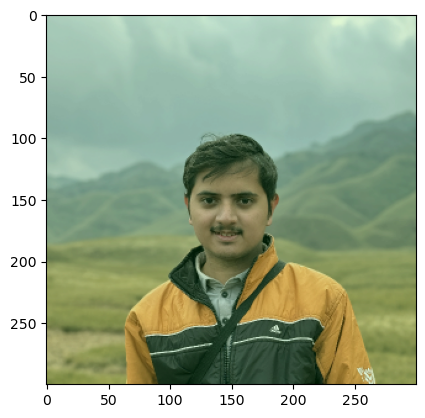

In [205]:
ShowImage(UpdateGreenComponent(image, 10))

In [206]:
def UpdateBlueComponent(_img_, scale = 10):
    image_ = []
    row = []
    rgb = []
    if scale == 0:
        return _img_
    elif scale > 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append((100 - scale)*_img_[h][w][0]//100)
                rgb.append((100 - scale)*_img_[h][w][1]//100)
                rgb.append((255 - _img_[h][w][2])*scale//100 + _img_[h][w][2])
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_
    if scale < 0:
        for h in range(len(_img_)):
            for w in range(len(_img_[0])):
                rgb.append(_img_[h][w][0] - (255 - _img_[h][w][0])*scale//100)
                rgb.append(_img_[h][w][1] - (255 - _img_[h][w][1])*scale//100)
                rgb.append((100 + scale)*_img_[h][w][2]//100)
                row.append(rgb)
                rgb = []
            image_.append(row)
            row = []
        return image_

Width of image: 300
Height of image: 300
RGB: [171, 180, 212]


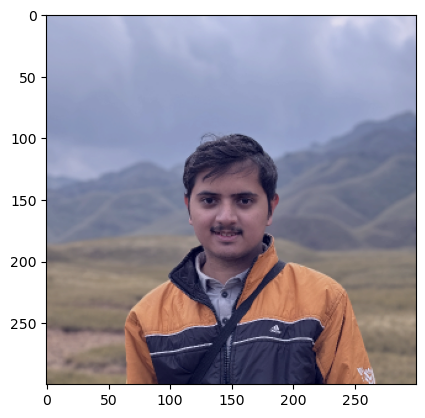

In [207]:
ShowImage(UpdateBlueComponent(image))

Width of image: 300
Height of image: 300
RGB: [186, 187, 183]


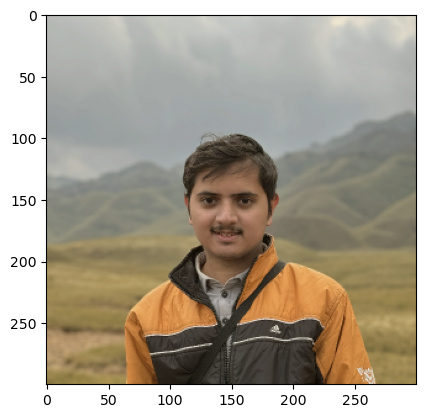

In [214]:
ShowImage(UpdateRedComponent(UpdateGreenComponent(image, 5), 7))